## Regression 

This notebook shows the implementation of linear regression model and deriving mean absolute error for the data set **Advertising** taken from http://www-bcf.usc.edu/~gareth/ISL/data.html

Libraries used are

- pandas: for data analysis and handling
- numpy: for numerical computation
- matplotlib: for plotting data
- sklearn: for regression, classification models


#### Data Description

There are 3 features *TV*, *Newspaper*, *Radio* and one response variable *Sales* having 200 data points. 

Model is:
$y=\beta_0 +\beta_1 x_1 +\beta_2 x_2 + \beta_3 x_3 $


In [1]:
import pandas as pd
import numpy as np

/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:21: UserWarning: The installed version of numexpr 1.4.2 is not supported in pandas and will be not be used
The minimum supported version is 2.1

  "version is 2.1\n".format(ver=ver), UserWarning)


In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [3]:
data.shape

(200, 4)

In [4]:
feature_col=['TV','Radio','Newspaper']
X=data[feature_col]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
X.shape

(200, 3)

In [6]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [7]:
y.shape

(200,)

In [8]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [9]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(150, 3)
(50, 3)
(150,)
(50,)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print linreg.intercept_
print linreg.coef_

2.95035218224
[ 0.04608355  0.17393967  0.00530564]


In [13]:
zip(feature_col,linreg.coef_)

[('TV', 0.046083547865933813),
 ('Radio', 0.17393967368630248),
 ('Newspaper', 0.0053056384347416625)]

In [14]:
y_pred=linreg.predict(X_test)

In [15]:
from sklearn import metrics
MAD= metrics.mean_absolute_error(y_test,y_pred)
print MAD

1.24563110032


In [16]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


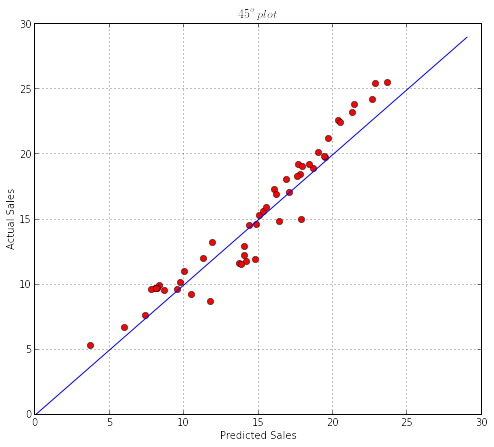

In [17]:
fig1=plt.figure(figsize=(8,7))
axes1=fig1.add_subplot(111)
a=np.arange(30)
axes1.plot(y_pred,y_test, color='red',linestyle='',marker='o')
axes1.plot(a,a, color='b',linestyle='-')
axes1.set_xlabel('Predicted Sales')
axes1.set_ylabel('Actual Sales')
axes1.set_title("$45^o plot$")
axes1.grid()
plt.show()

In [18]:
w=np.ravel(y_test)
w

array([  9.7,   8.7,  22.6,  15.3,  18.9,  17. ,  12. ,  25.4,  11. ,
         9.6,  11.9,  11.6,   9.9,  19.2,  22.4,  18.4,   7.6,  17.3,
         6.7,  23.8,  14.5,  12.2,  24.2,   9.7,   5.3,  18. ,   9.6,
        18.3,  19.2,  19.7,  16.9,  13.2,  12.9,  25.5,   9.7,  15.6,
         9.2,  15.9,  15. ,  20.1,  11.7,  14.8,   9.5,  14.6,  11.5,
        19.8,  23.2,  10.1,  21.2,  19. ])

In [19]:
y_pred

array([  8.11009029,  11.80465196,  20.38621962,  15.11190787,
        18.73228949,  17.13300113,  11.33475813,  22.89513701,
        10.0710859 ,   9.54574788,  14.79825719,  13.77329008,
         8.34004235,  17.68910696,  20.53266814,  17.84071853,
         7.43997301,  16.07314551,   6.04093652,  21.49219446,
        14.41792225,  14.10425612,  22.70942573,   8.26368321,
         3.75944687,  16.92525397,   7.8497517 ,  17.65346878,
        18.43530612,  19.53845625,  16.25295751,  11.96035765,
        14.08620035,  23.67634592,   8.18670246,  15.32537315,
        10.50206474,  15.58163467,  17.92962147,  19.08765535,
        14.21149462,  16.43353246,   8.69257232,  14.87750688,
        13.86023198,  19.42824854,  21.32244608,   9.76697029,
        19.71266192,  17.94989155])

In [20]:
x=np.arange(1,51)
pf=pd.DataFrame(x,columns=['x'])
pf['y_predicted']=y_pred
pf['y_actual']=w

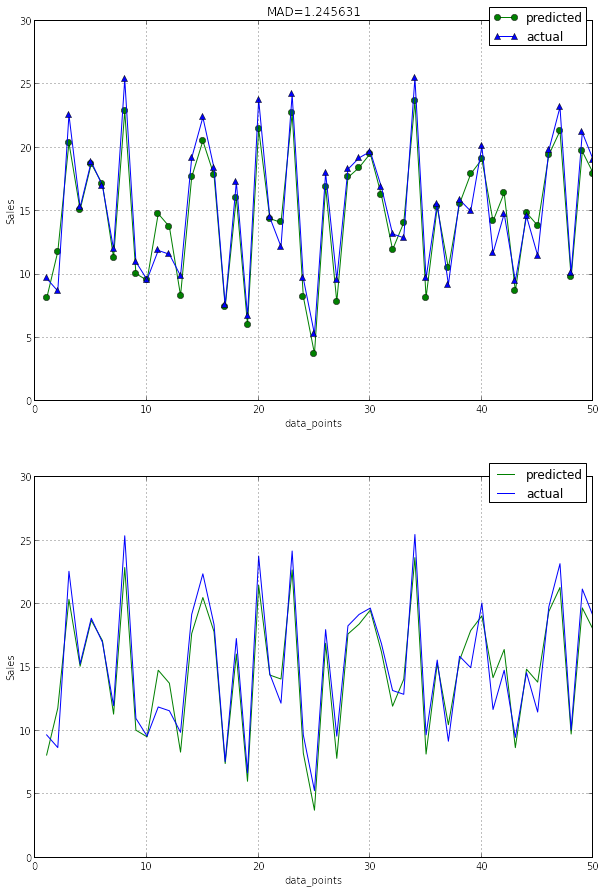

In [21]:
fig2=plt.figure(figsize=(10,15))
axes=fig2.add_subplot(211)
axes.plot(pf['x'],pf['y_predicted'],'go',linestyle='-',label='predicted')
axes.plot(pf['x'],pf['y_actual'],'b^',linestyle='-',label='actual')
axes.set_xlabel('data_points')
axes.set_ylabel('Sales')
axes.set_title("MAD=%f" %(MAD))
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()

axes=fig2.add_subplot(212)
axes.plot(pf['x'],pf['y_predicted'],'g',linestyle='-',label='predicted')
axes.plot(pf['x'],pf['y_actual'],'b',linestyle='-',label='actual')
axes.set_xlabel('data_points')
axes.set_ylabel('Sales')
axes.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
axes.grid()
plt.show()
